In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import gcsfs
import zarr

In [197]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-50, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

In [3]:
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

In [4]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [5]:
df_orog_cm4 = df.query("source_id=='GFDL-CM4' & experiment_id == 'piControl' & variable_id == 'orog' & grid_label=='gr1'")
df_orog_cm4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
1057,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,fx,orog,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701


In [6]:
df_orog_esm4 = df.query("source_id=='GFDL-ESM4' & experiment_id == 'piControl' & variable_id == 'orog' & grid_label=='gr1'")
df_orog_esm4

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
14877,CMIP,NOAA-GFDL,GFDL-ESM4,piControl,r1i1p1f1,fx,orog,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piCo...,NaN,20180701


In [7]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_orog_esm4.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

orog_esm4 = xr.open_zarr(mapper, consolidated=True)
orog_esm4

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 180, lon: 288)
Coordinates:
  * bnds      (bnds) float64 1.0 2.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Data variables:
    orog      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          Coupled climate state after 400 years of spinup, ...
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/e0d39952-a008-419b-8454-d44d8e138fec
    variable_id:            orog
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/e0d39952-a008-419b-8454-d44d8e138fec
    version_id:             v20180701

In [8]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = df_orog_cm4.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

orog_cm4 = xr.open_zarr(mapper, consolidated=True)
orog_cm4

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 180, lon: 288)
Coordinates:
  * bnds      (bnds) float64 1.0 2.0
  * lat       (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds  (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon       (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
    lon_bnds  (lon, bnds) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Data variables:
    orog      (lat, lon) float32 dask.array<chunksize=(180, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54750.0
    comment:                <null ref>
    ...                     ...
    tracking_id:            hdl:21.14100/b1cb5f94-7f79-4685-abfb-41e76cbc68ac
    variable_id:            orog
    variant_info:           N/A
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/b1cb5f94-7f79-4685-abfb-41e76cbc68ac
    version_id:             v20180701

In [9]:
CM4_orog = orog_cm4.orog

In [23]:
CM4_orog.values

array([[2870.0527, 2870.0527, 2870.0527, ..., 2870.0527, 2870.0527,
        2870.0527],
       [2706.9758, 2708.4407, 2709.924 , ..., 2702.6936, 2704.1025,
        2705.53  ],
       [2616.392 , 2617.273 , 2618.1582, ..., 2613.7773, 2614.6443,
        2615.5159],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [10]:
ESM4_orog = orog_esm4.orog

In [223]:
ross_CM4 = CM4_orog.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(CM4_orog<=300)
ross_ESM4 = ESM4_orog.sel(lat=slice(-99,-75)).sel(lon=slice(150,240)).where(ESM4_orog<=300)

filchner_CM4 = CM4_orog.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(CM4_orog<=300)
filchner_ESM4 = ESM4_orog.sel(lat=slice(-99,-76)).sel(lon=slice(270,340)).where(ESM4_orog<=300)

peninsula_CM4 = CM4_orog.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))
peninsula_ESM4 = ESM4_orog.sel(lat=slice(-74,-59)).sel(lon=slice(270,320))

loweast_CM4 = CM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(CM4_orog<=2250).where(CM4_orog>300)
loweast_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,180)).where(ESM4_orog<=2250).where(CM4_orog>300)

lowwest_CM4 = CM4_orog.sel(lat=slice(-99,-72)).sel(lon=slice(180,360)).where(CM4_orog<=2250).where(CM4_orog>=300)
lowwest_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(180,360)).where(ESM4_orog<=2250).where(CM4_orog>=300)


plateau_CM4 = CM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(CM4_orog>=2250)
plateau_ESM4 = ESM4_orog.sel(lat=slice(-99,-59)).sel(lon=slice(0,360)).where(ESM4_orog>=2250)

In [224]:
ross_CM4_mask = (ross_CM4 / ross_CM4)
ross_ESM4_mask = (ross_ESM4 / ross_ESM4)

filchner_CM4_mask = (filchner_CM4 / filchner_CM4)
filchner_ESM4_mask = (filchner_ESM4 / filchner_ESM4)

peninsula_CM4_mask = (peninsula_CM4 / peninsula_CM4)
peninsula_ESM4_mask = (peninsula_ESM4 / peninsula_ESM4)

loweast_CM4_mask = (loweast_CM4 / loweast_CM4)
loweast_ESM4_mask = (loweast_ESM4 / loweast_ESM4)

#test = xr.zeros_like(peninsula_CM4_mask)
lowwest_CM4_mask = ((lowwest_CM4) /lowwest_CM4)
lowwest_ESM4_mask = (lowwest_ESM4 / lowwest_ESM4)

plateau_CM4_mask = (plateau_CM4 / plateau_CM4)
plateau_ESM4_mask = (plateau_ESM4 / plateau_ESM4)

In [225]:
test=lowwest_CM4_mask*peninsula_CM4_mask


In [226]:
# lowwest_CM4_mask.where(lowwest_CM4_mask==1).plot()

In [227]:
# test.values

In [228]:
# lowwest_CM4_mask.values

In [229]:
# for i in peninsula_CM4_mask:
#     if i in lowwest_CM4_mask:
#         lowwest_CM4_mask.remove(i)

# lowwest_CM4_mask.values

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tmp/ipykernel_232099/3025736357.py:100: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


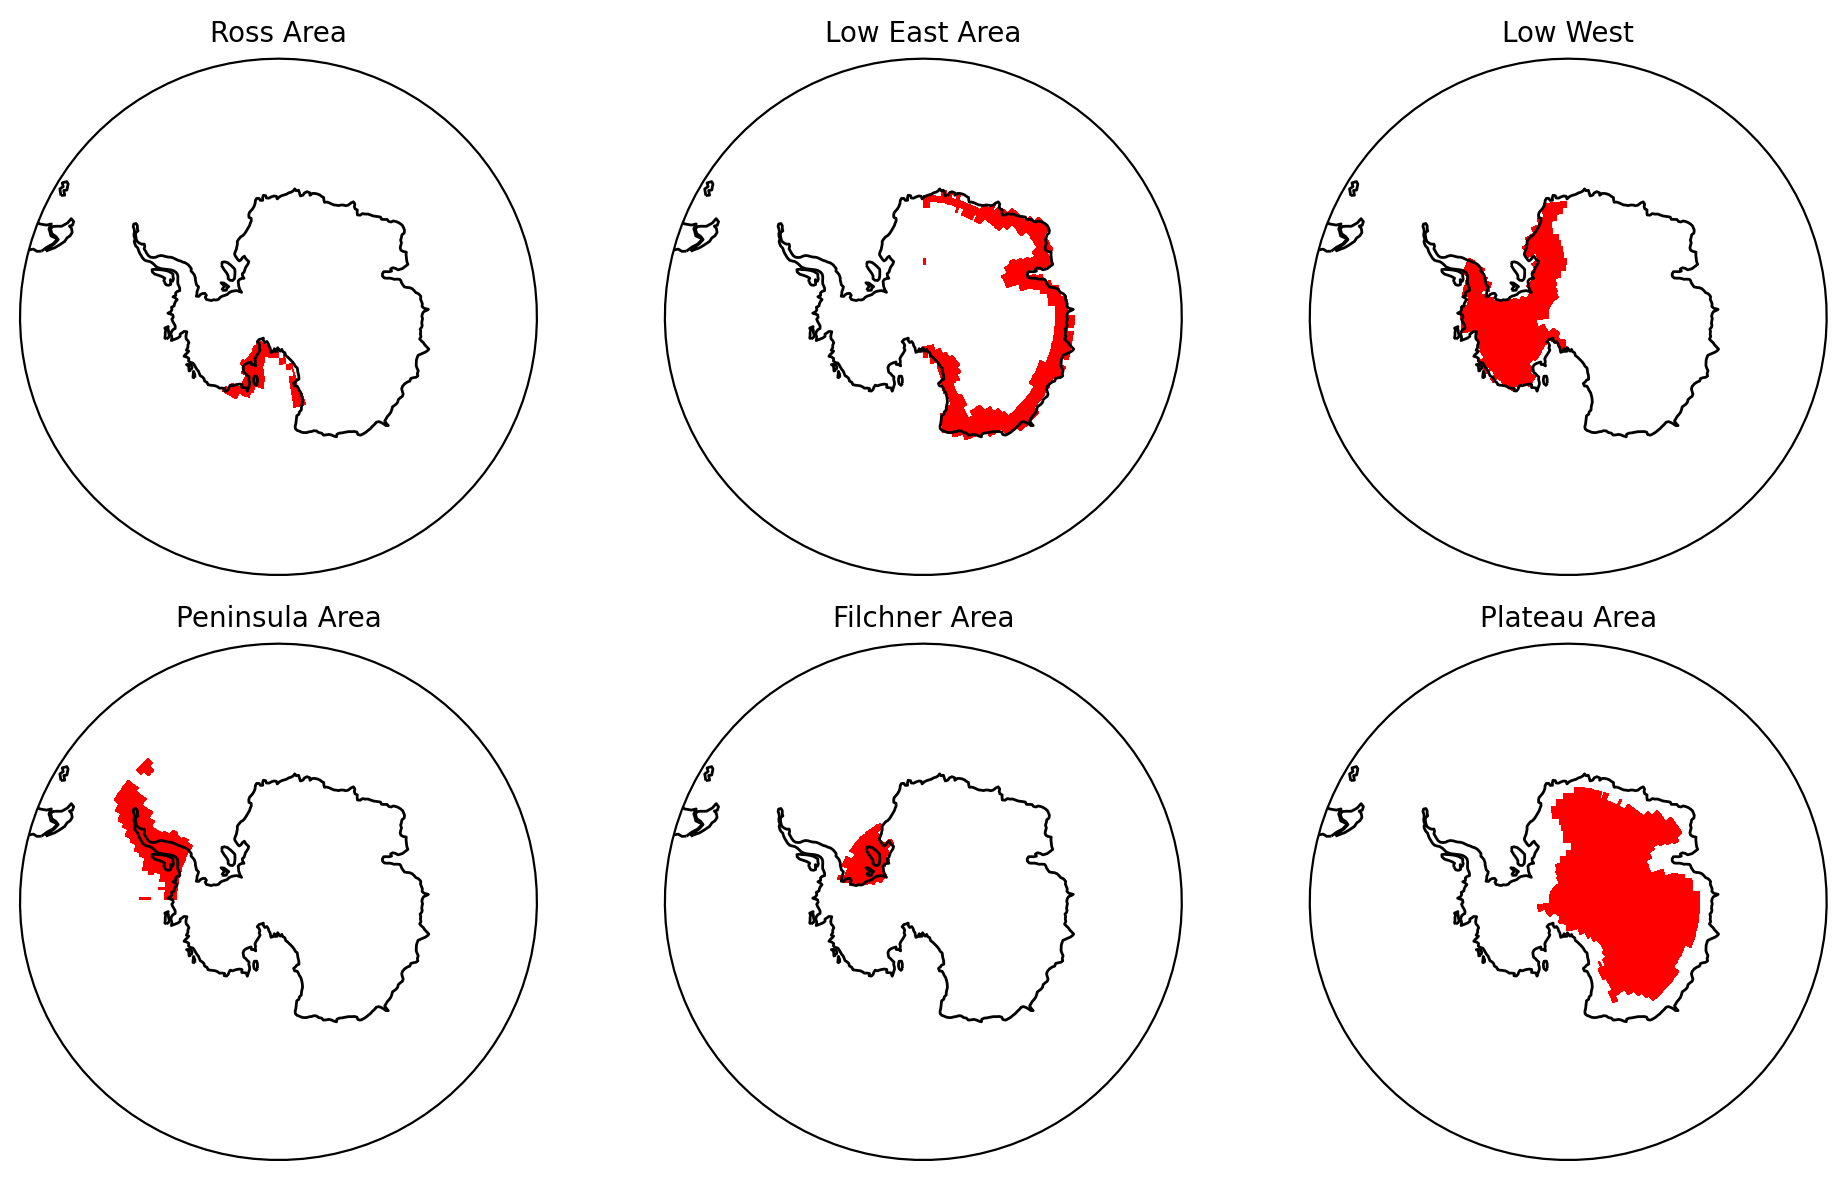

In [230]:
fig, ax = south_pole_map(cols=3, rows=2,fig_size=(10,6))


ross_CM4_mask.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha= 0.5,
              cmap='r',add_colorbar=False, levels=60)
    
loweast_CM4_mask.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r', add_colorbar=False, levels=60)
lowwest_CM4_mask.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
                # alpha= 0.2,
               cmap='r',add_colorbar=False, levels=60)
    
peninsula_CM4_mask.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              vmin=0,
               vmax=4000,
               extend='both',
                # alpha=0.5,
               cmap= 'r',add_colorbar=False, levels=60)
filchner_CM4_mask.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
              cmap='r',add_colorbar=False, levels=60)
plateau_CM4_mask.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              vmin=0,
              vmax=4000,
              extend='both',
               # alpha=0.5,
              cmap='r',add_colorbar=False, levels=60)
# ross_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="Oranges", add_colorbar=False)

# loweast_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="PuRd", add_colorbar=False)


# lowwest_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="Blues", add_colorbar=False)

# peninsula_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="Greys", add_colorbar=False)

# filchner_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="Reds", add_colorbar=False)

# plateau_CM4_mask.plot(ax=ax[1,4],
#                transform =ccrs.PlateCarree(),
#                extend='both',
#                cmap="Greens", add_colorbar=False)


# ax[0].set_title('Ross Region')
# ax[1].set_title('Low East Region')
# ax[2].set_title('Low West Region')
# ax[3].set_title('Peninsula Region')
# ax[4].set_title('Filchner Region')
# ax[5].set_title('Plateau Region')
# ax[6].set_title('All Regions Plotted')

ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()

ax[0,0].set_title('Ross Area',size=10)
ax[0,1].set_title('Low East Area',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Peninsula Area',size=10)
ax[1,1].set_title('Filchner Area',size=10)
ax[1,2].set_title('Plateau Area',size=10)
plt.tight_layout()



In [18]:
new_CM4_mask_antarctica= xr.Dataset()
new_ESM4_mask_antarctica=xr.Dataset()

In [19]:
# Added CM4_orog to the dataset so the mask dimensions 
#get defaulted to the entire plot of antarctica

new_CM4_mask_antarctica['orog']=CM4_orog
new_CM4_mask_antarctica['ross_CM4']=ross_CM4_mask
new_CM4_mask_antarctica['filchner_CM4']=filchner_CM4_mask
new_CM4_mask_antarctica['peninsula_CM4']=peninsula_CM4_mask
new_CM4_mask_antarctica['loweast_CM4']=loweast_CM4_mask
new_CM4_mask_antarctica['lowwest_CM4']=lowwest_CM4_mask
new_CM4_mask_antarctica['plateau_CM4']=plateau_CM4_mask

In [20]:
# Added ESM4_orog to the dataset so the mask dimensions 
#get defaulted to the entire plot of antarctica

new_ESM4_mask_antarctica['orog']=ESM4_orog
new_ESM4_mask_antarctica['ross_ESM4']=ross_ESM4_mask
new_ESM4_mask_antarctica['filchner_ESM4']=filchner_ESM4_mask
new_ESM4_mask_antarctica['peninsula_ESM4']=peninsula_ESM4_mask
new_ESM4_mask_antarctica['loweast_ESM4']=loweast_ESM4_mask
new_ESM4_mask_antarctica['lowwest_ESM4']=lowwest_ESM4_mask
new_ESM4_mask_antarctica['plateau_ESM4']=plateau_ESM4_mask

In [21]:
new_CM4_mask_antarctica.to_netcdf('CM4_mask_antarctica.nc')
new_ESM4_mask_antarctica.to_netcdf('ESM4_mask_antarctica.nc')

/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/tu.temple.edu/tuo59681/miniconda3/envs/occ_basic/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


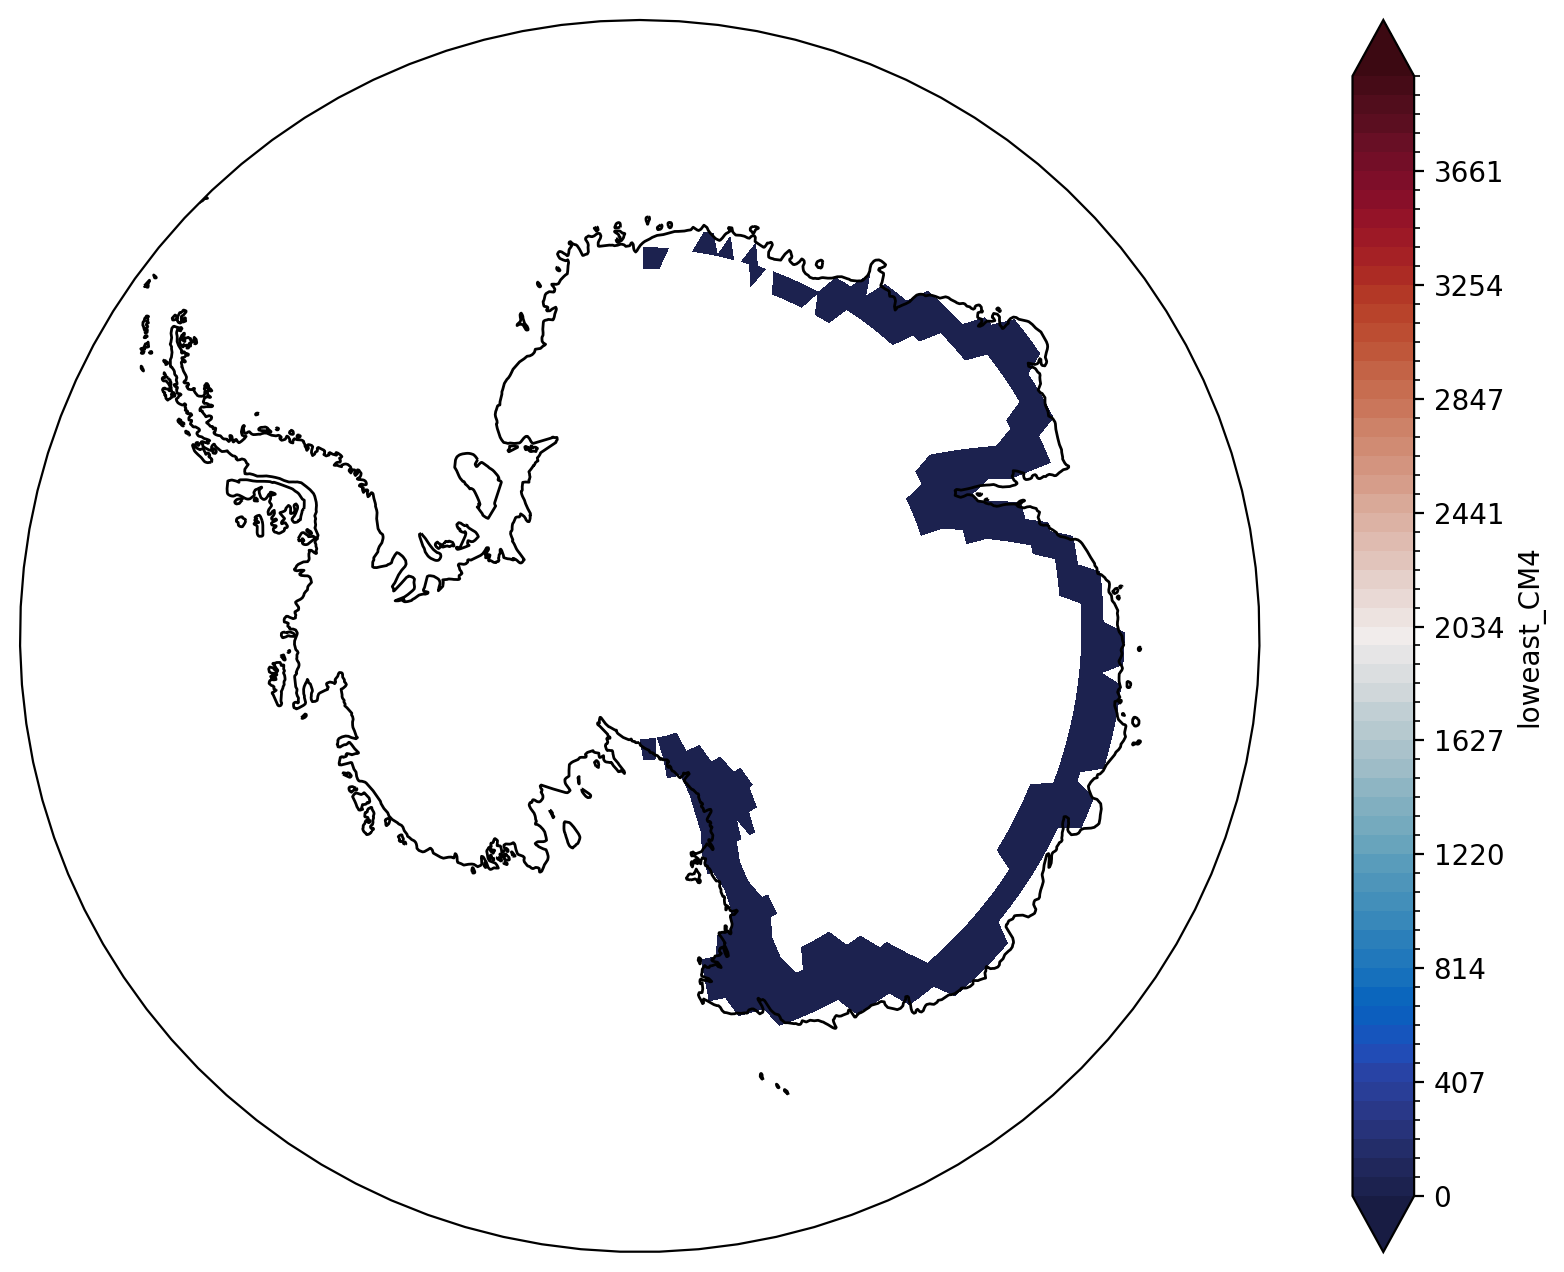

In [38]:
#plot of just new mask, works
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
new_CM4_mask_antarctica.loweast_CM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [ ]:
lowwest_sea_temp=(temp_CM4*(new_CM4_mask_antarctica.lowwest_CM4))
lowwest_test=lowwest_sea_temp.mean(dim='time').mean(dim='pfull')

In [ ]:
# new mask with orog added plotted with temp data, works for CM4
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_test.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()

In [ ]:
lowwest_sea_temp_ESM4=(temp_CM4*(new_ESM4_mask_antarctica.lowwest_ESM4))
lowwest_test_ESM4=lowwest_sea_temp_ESM4.mean(dim='time').mean(dim='pfull')

In [ ]:
# new mask with orog added plotted with temp data, works for ESM4
subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
fig, ax = plt.subplots(figsize=[12, 8],subplot_kw=subplot_kws)
    
lowwest_test_ESM4.plot.contourf(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=0,
               vmax=4000,
               extend='both',
               cmap=cmocean.cm.balance, levels=60)


    # Limit the map to -50 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.coastlines()